<a href="https://colab.research.google.com/github/DenisGubanov/EVRAZ-Collabs-solution/blob/main/EVRAZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

def metric(answers, user_csv):

    delta_c = np.abs(np.array(answers['C']) - np.array(user_csv['C']))
    hit_rate_c = np.int64(delta_c < 0.02)

    delta_t = np.abs(np.array(answers['TST']) - np.array(user_csv['TST']))
    hit_rate_t = np.int64(delta_t < 20)

    N = np.size(answers['C'])

    return np.sum(hit_rate_c + hit_rate_t) / 2 / N

In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
target_train = pd.read_csv('/content/drive/MyDrive/target_train.csv')
sip_train = pd.read_csv('/content/drive/MyDrive/sip_train.csv') # !
sip_test = pd.read_csv('/content/drive/MyDrive/sip_test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
produv_train = pd.read_csv('/content/drive/MyDrive/produv_train.csv') # !
produv_test = pd.read_csv('/content/drive/MyDrive/produv_test.csv')
plavki_train = pd.read_csv('/content/drive/MyDrive/plavki_train.csv') # !
plavki_test = pd.read_csv('/content/drive/MyDrive/plavki_test.csv')
lom_train = pd.read_csv('/content/drive/MyDrive/lom_train.csv')
lom_test = pd.read_csv('/content/drive/MyDrive/lom_test.csv')
gas_train = pd.read_csv('/content/drive/MyDrive/gas_train.csv') # !
gas_test = pd.read_csv('/content/drive/MyDrive/gas_test.csv')
chugun_train = pd.read_csv('/content/drive/MyDrive/chugun_train.csv') # !
chugun_test = pd.read_csv('/content/drive/MyDrive/chugun_test.csv')
chronom_train = pd.read_csv('/content/drive/MyDrive/chronom_train.csv')
chronom_test = pd.read_csv('/content/drive/MyDrive/chronom_test.csv')
#train = [target_train,sip_train,produv_train,plavki_train,lom_train,gas_train,chugun_train,chronom_train]
#train = [sample_submission,sip_test,produv_test,plavki_test,lom_test,gas_test,chugun_test,chronom_test]

In [328]:
target_train

NPLV   TST      C
0     510008  1690  0.060
1     510009  1683  0.097
2     510010  1662  0.091
3     510011  1609  0.410
4     510012  1682  0.120
...      ...   ...    ...
2058  512318  1626  0.145
2059  512319  1643  0.087
2060  512320  1615  0.141
2061  512321  1654  0.270
2062  512322  1630  0.183

[2063 rows x 3 columns]

In [5]:
import matplotlib.ticker as ticker

def barplot_data(listx,listy,sizex=18,sizey=6,stepx=6,stepy=6,numberx=True,ox=True):   
    fig, ax = plt.subplots()
    fig.set_figwidth(sizex)
    fig.set_figheight(sizey)
    b = ax.bar(listx, listy, color='orange')
    ax.yaxis.set_major_locator(ticker.MultipleLocator(round(sizey/stepy)))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(round(sizex/stepx)))
    if (numberx):
        for rect in b:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

    plt.show()

# Первичный просмотр данных target_train.

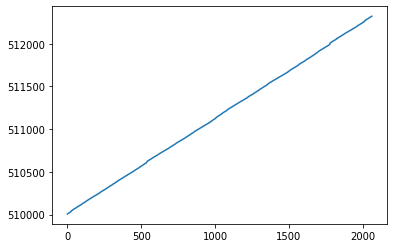

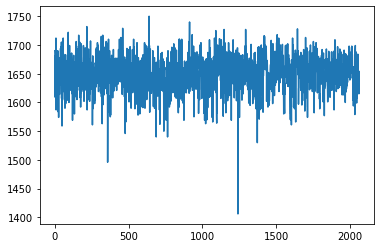

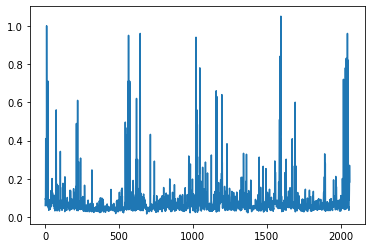

In [6]:
for i in target_train.columns:
    plt.plot(target_train[i])
    plt.show()

In [7]:
target_train.mean()

NPLV    511162.537082
TST       1649.139603
C            0.082379
dtype: float64

In [8]:
target_train.TST.mode()

0    1660
dtype: int64

In [9]:
target_train.C.mode()

0    0.044
dtype: float64

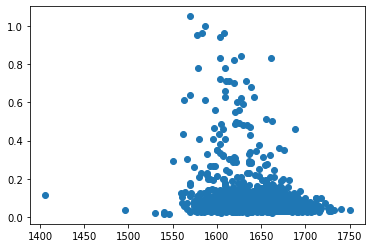

In [10]:
plt.scatter(target_train.TST,target_train.C) # C > 0.2

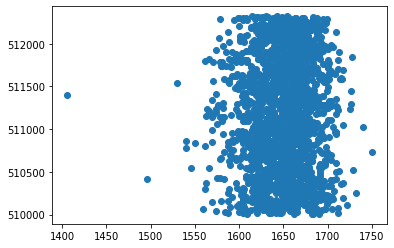

In [11]:
plt.scatter(target_train.TST,target_train.NPLV)


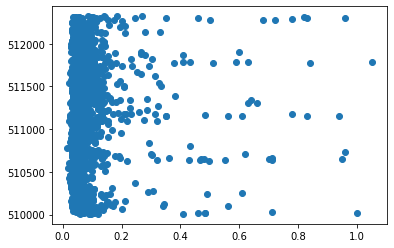

In [12]:
plt.scatter(target_train.C,target_train.NPLV)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


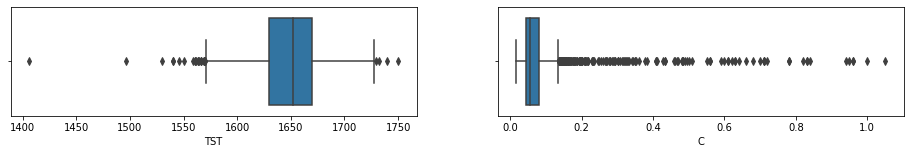

In [13]:
plt.figure(figsize=(16,2))
plt.subplot(1,2,1)
sns.boxplot(target_train.TST)
plt.subplot(1,2,2)
sns.boxplot(target_train.C)

In [14]:
sip_train

NPLV  VDSYP     NMSYP  VSSYP              DAT_OTD
0      510008    346  Уголь ТО    570  2021-01-01 03:03:53
1      510008    346  Уголь ТО    220  2021-01-01 03:04:10
2      510008    408   изв_ЦОИ   7300  2021-01-01 03:08:17
3      510008    346  Уголь ТО    270  2021-01-01 03:09:03
4      510008    346  Уголь ТО    430  2021-01-01 03:09:20
...       ...    ...       ...    ...                  ...
31579  512322    408   изв_ЦОИ     30  2021-04-26 18:28:06
31580  512322    408   изв_ЦОИ    490  2021-04-26 18:28:07
31581  512322    408   изв_ЦОИ     20  2021-04-26 18:28:22
31582  512322    408   изв_ЦОИ    970  2021-04-26 18:30:26
31583  512322    408   изв_ЦОИ     10  2021-04-26 18:30:42

[31584 rows x 5 columns]

In [15]:
sip_train.groupby(by=["NMSYP"]).count()

NPLV  VDSYP  VSSYP  DAT_OTD
NMSYP                                   
Долом(сыр)      2      2      2        2
Уголь ТО     7747   7747   7747     7747
ФЛЮМАГ       2930   2930   2930     2930
Флюс ФОМИ    1624   1624   1624     1624
изв отсев     226    226    226      226
изв_ЦОИ     19055  19055  19055    19055

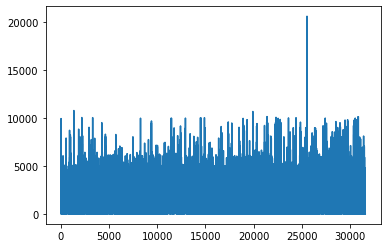

In [16]:
plt.plot(sip_train.VSSYP)

In [17]:
sip_train.mean()

NPLV     511094.134847
VDSYP       381.831687
VSSYP      1373.730686
dtype: float64

In [18]:
sip_train.VSSYP.mode()

0    10
dtype: int64

In [19]:
sip_train.groupby(by=["NMSYP"]).count()

NPLV  VDSYP  VSSYP  DAT_OTD
NMSYP                                   
Долом(сыр)      2      2      2        2
Уголь ТО     7747   7747   7747     7747
ФЛЮМАГ       2930   2930   2930     2930
Флюс ФОМИ    1624   1624   1624     1624
изв отсев     226    226    226      226
изв_ЦОИ     19055  19055  19055    19055

In [20]:
sip_train = sip_train.drop(sip_train[sip_train.NMSYP == 'изв отсев'].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


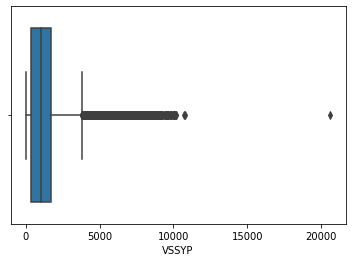

In [21]:
sns.boxplot(sip_train.VSSYP) # Может быть проблемой! 

In [22]:
produv_train

NPLV                  SEC         RAS       POL
0        510008  2021-01-01 03:18:26  382.000000  3.920000
1        510008  2021-01-01 03:18:28  382.000000  3.920000
2        510008  2021-01-01 03:18:30  553.000000  3.920000
3        510008  2021-01-01 03:18:32  701.000000  3.920000
4        510008  2021-01-01 03:18:34  813.000000  3.920000
...         ...                  ...         ...       ...
4729797  512322  2021-05-05 16:30:46  363.996249  4.850045
4729798  512322  2021-05-05 16:30:48  363.996999  4.850036
4729799  512322  2021-05-05 16:30:50  363.997749  4.850027
4729800  512322  2021-05-05 16:30:52  363.998499  4.850018
4729801  512322  2021-05-05 16:30:54  363.999250  4.850009

[4729802 rows x 4 columns]

In [23]:
chugun_train

NPLV       VES       T    SI  ...    CU      V     TI          DATA_ZAMERA
0     510008  263700.0  1396.0  0.44  ...  0.03  0.103  0.084  2021-01-01 03:15:03
1     510009  264500.0  1419.0  0.68  ...  0.03  0.084  0.096  2021-01-01 04:23:48
2     510010  263800.0  1384.0  0.56  ...  0.03  0.115  0.110  2021-01-01 05:21:40
3     510011  264000.0  1401.0  0.48  ...  0.02  0.112  0.110  2021-01-01 06:20:57
4     510012  263300.0  1422.0  0.47  ...  0.03  0.083  0.070  2021-01-01 07:23:02
...      ...       ...     ...   ...  ...   ...    ...    ...                  ...
2058  512318  267200.0  1415.0  0.38  ...  0.02  0.081  0.060  2021-04-26 12:53:40
2059  512319  266800.0  1405.0  0.50  ...  0.02  0.079  0.081  2021-04-26 14:21:57
2060  512320  276100.0  1398.0  0.61  ...  0.03  0.086  0.066  2021-04-26 14:33:29
2061  512321  275800.0  1408.0  0.38  ...  0.03  0.076  0.060  2021-04-26 15:50:53
2062  512322  279200.0  1413.0  0.50  ...  0.03  0.077  0.067  2021-04-26 17:13:49

[2063 rows x 13 columns]

In [329]:
train_main = pd.DataFrame()
train_main['NPLV'] = range(2315)
train_main['NPLV'] += 510008

In [330]:
for k in chugun_train.columns:
  if (k != 'NPLV'):
    train_main[str(k+'_CH')] = 0.0
print(train_main)
for i in range(2315):
  for j in range(2063):
    if (int(train_main['NPLV'][i]) == int(chugun_train['NPLV'][j])):
      for k in chugun_train.columns:
        if ((k != 'NPLV') & (k != 'DATA_ZAMERA')):
          train_main[str(k+'_CH')][i] = float(chugun_train[k][j])
        elif (k != 'NPLV'):
          train_main[str(k+'_CH')][i] = (chugun_train[k][j])

        NPLV  VES_CH  T_CH  SI_CH  ...  CU_CH  V_CH  TI_CH  DATA_ZAMERA_CH
0     510008     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0
1     510009     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0
2     510010     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0
3     510011     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0
4     510012     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0
...      ...     ...   ...    ...  ...    ...   ...    ...             ...
2310  512318     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0
2311  512319     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0
2312  512320     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0
2313  512321     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0
2314  512322     0.0   0.0    0.0  ...    0.0   0.0    0.0             0.0

[2315 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(in

In [331]:
train_main

NPLV    VES_CH    T_CH  SI_CH  ...  CU_CH   V_CH  TI_CH       DATA_ZAMERA_CH
0     510008  263700.0  1396.0   0.44  ...   0.03  0.103  0.084  2021-01-01 03:15:03
1     510009  264500.0  1419.0   0.68  ...   0.03  0.084  0.096  2021-01-01 04:23:48
2     510010  263800.0  1384.0   0.56  ...   0.03  0.115  0.110  2021-01-01 05:21:40
3     510011  264000.0  1401.0   0.48  ...   0.02  0.112  0.110  2021-01-01 06:20:57
4     510012  263300.0  1422.0   0.47  ...   0.03  0.083  0.070  2021-01-01 07:23:02
...      ...       ...     ...    ...  ...    ...    ...    ...                  ...
2310  512318  267200.0  1415.0   0.38  ...   0.02  0.081  0.060  2021-04-26 12:53:40
2311  512319  266800.0  1405.0   0.50  ...   0.02  0.079  0.081  2021-04-26 14:21:57
2312  512320  276100.0  1398.0   0.61  ...   0.03  0.086  0.066  2021-04-26 14:33:29
2313  512321  275800.0  1408.0   0.38  ...   0.03  0.076  0.060  2021-04-26 15:50:53
2314  512322  279200.0  1413.0   0.50  ...   0.03  0.077  0.067  2021-04-26 17:13:49

[2315 rows x 13 columns]

In [332]:
plavki_train

NPLV       plavka_VR_NACH  ...       plavka_TIPE_GOL plavka_ST_GOL
0     510008  2021-01-01 03:08:11  ...  5 сопловая                      11
1     510009  2021-01-01 04:00:44  ...  5 сопловая                      12
2     510010  2021-01-01 05:12:29  ...  5 сопловая                      13
3     510011  2021-01-01 06:13:48  ...  5 сопловая                      14
4     510012  2021-01-01 07:13:44  ...  5 сопловая                      15
...      ...                  ...  ...                   ...           ...
2132  512318  2021-04-26 13:04:26  ...  5 сопловая                      56
2133  512319  2021-04-26 14:10:20  ...  5 сопловая                      57
2134  512320  2021-04-26 15:21:37  ...  5 сопловая                      58
2135  512321  2021-04-26 16:22:37  ...  5 сопловая                      59
2136  512322  2021-04-26 17:28:00  ...  5 сопловая                      60

[2137 rows x 10 columns]

In [333]:
plavki_train["DELTA"] = pd.to_datetime(plavki_train["plavka_VR_KON"]) - pd.to_datetime(plavki_train["plavka_VR_NACH"])
plavki_train = plavki_train.drop(['plavka_VR_KON','plavka_VR_NACH'], axis=1)

In [334]:
plavki_train

NPLV       plavka_NMZ  ... plavka_ST_GOL           DELTA
0     510008  С255             ...            11 0 days 00:42:59
1     510009  С255             ...            12 0 days 01:06:44
2     510010  Ст3пс/Э          ...            13 0 days 00:48:24
3     510011  Св-08А.z02       ...            14 0 days 00:54:51
4     510012  SC2M/ЭТ          ...            15 0 days 00:48:15
...      ...              ...  ...           ...             ...
2132  512318  C071TM.z01/ЭТ    ...            56 0 days 00:51:24
2133  512319  C071TM.z01/ЭТ    ...            57 0 days 01:04:03
2134  512320  40Х.1            ...            58 0 days 00:55:05
2135  512321  40Х.1            ...            59 0 days 01:01:00
2136  512322  40Х.1            ...            60 0 days 01:20:40

[2137 rows x 9 columns]

In [335]:
for k in plavki_train.columns:
  if (k != 'NPLV'):
    train_main[str(k)] = 0
print(train_main)
for i in range(2315):
  for j in range(2137):
    if (int(train_main['NPLV'][i]) == int(plavki_train['NPLV'][j])):
      for k in plavki_train.columns:
        train_main[str(k)][i] = plavki_train[k][j]

        NPLV    VES_CH    T_CH  ...  plavka_TIPE_GOL  plavka_ST_GOL  DELTA
0     510008  263700.0  1396.0  ...                0              0      0
1     510009  264500.0  1419.0  ...                0              0      0
2     510010  263800.0  1384.0  ...                0              0      0
3     510011  264000.0  1401.0  ...                0              0      0
4     510012  263300.0  1422.0  ...                0              0      0
...      ...       ...     ...  ...              ...            ...    ...
2310  512318  267200.0  1415.0  ...                0              0      0
2311  512319  266800.0  1405.0  ...                0              0      0
2312  512320  276100.0  1398.0  ...                0              0      0
2313  512321  275800.0  1408.0  ...                0              0      0
2314  512322  279200.0  1413.0  ...                0              0      0

[2315 rows x 21 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [336]:
train_main

NPLV    VES_CH  ...  plavka_ST_GOL            DELTA
0     510008  263700.0  ...             11  0 days 00:42:59
1     510009  264500.0  ...             12  0 days 01:06:44
2     510010  263800.0  ...             13  0 days 00:48:24
3     510011  264000.0  ...             14  0 days 00:54:51
4     510012  263300.0  ...             15  0 days 00:48:15
...      ...       ...  ...            ...              ...
2310  512318  267200.0  ...             56  0 days 00:51:24
2311  512319  266800.0  ...             57  0 days 01:04:03
2312  512320  276100.0  ...             58  0 days 00:55:05
2313  512321  275800.0  ...             59  0 days 01:01:00
2314  512322  279200.0  ...             60  0 days 01:20:40

[2315 rows x 21 columns]

In [337]:
gas_train_g = gas_train.groupby(by=["NPLV"]).median()

In [338]:
gas_train_g['T1'] = gas_train_g['T фурмы 1']
gas_train_g['T2'] = gas_train_g['T фурмы 2']
gas_train_g = gas_train_g.drop(['T фурмы 1','T фурмы 2'],axis=1)
gas_train_g

V           T     O2  ...  O2_pressure         T1         T2
NPLV                                      ...                                   
510008  216773.484375  445.138885   9.06  ...    13.310185   0.000000   0.000000
510009  217732.421875  193.055557   5.35  ...    14.033565   0.000000   0.000000
510010  216345.906250  337.500000   8.70  ...    13.975695   0.000000   0.000000
510011  218475.359375  301.041656  12.24  ...    14.033565   0.000000   0.000000
510012  218051.125000  393.055573   7.72  ...    14.120370   0.000000   0.000000
...               ...         ...    ...  ...          ...        ...        ...
512318  208166.593750  357.812500   0.00  ...    15.205440  26.070601  25.868059
512319  207944.078125  248.958328  12.31  ...    14.532698  24.913195  26.236064
512320  206042.953125  280.902771  10.85  ...    14.756945  25.462965  26.475695
512321  205255.031250  235.937492   0.00  ...    15.186170  24.623842  26.953949
512322  206267.531250  132.291656  15.87  ...    15.444155  24.266692  26.963443

[2063 rows x 11 columns]

In [339]:
gas_train_g['NPLV'] = gas_train_g.index

In [340]:
gas_train_g.index = range(2063)

In [341]:
gas_train_g

V           T     O2  ...         T1         T2    NPLV
0     216773.484375  445.138885   9.06  ...   0.000000   0.000000  510008
1     217732.421875  193.055557   5.35  ...   0.000000   0.000000  510009
2     216345.906250  337.500000   8.70  ...   0.000000   0.000000  510010
3     218475.359375  301.041656  12.24  ...   0.000000   0.000000  510011
4     218051.125000  393.055573   7.72  ...   0.000000   0.000000  510012
...             ...         ...    ...  ...        ...        ...     ...
2058  208166.593750  357.812500   0.00  ...  26.070601  25.868059  512318
2059  207944.078125  248.958328  12.31  ...  24.913195  26.236064  512319
2060  206042.953125  280.902771  10.85  ...  25.462965  26.475695  512320
2061  205255.031250  235.937492   0.00  ...  24.623842  26.953949  512321
2062  206267.531250  132.291656  15.87  ...  24.266692  26.963443  512322

[2063 rows x 12 columns]

In [342]:
for k in gas_train_g.columns:
  if (k != 'NPLV'):
    train_main[str(k+'_GAS')] = 0.0
print(train_main)
for i in range(2315):
  for j in range(2063):
    if (int(train_main['NPLV'][i]) == int(gas_train_g['NPLV'][j])):
      for k in gas_train_g.columns:
        if (k != 'NPLV'):
          train_main[str(k+'_GAS')][i] = gas_train_g[k][j]

        NPLV    VES_CH    T_CH  SI_CH  ...  AR_GAS  O2_pressure_GAS  T1_GAS  T2_GAS
0     510008  263700.0  1396.0   0.44  ...     0.0              0.0     0.0     0.0
1     510009  264500.0  1419.0   0.68  ...     0.0              0.0     0.0     0.0
2     510010  263800.0  1384.0   0.56  ...     0.0              0.0     0.0     0.0
3     510011  264000.0  1401.0   0.48  ...     0.0              0.0     0.0     0.0
4     510012  263300.0  1422.0   0.47  ...     0.0              0.0     0.0     0.0
...      ...       ...     ...    ...  ...     ...              ...     ...     ...
2310  512318  267200.0  1415.0   0.38  ...     0.0              0.0     0.0     0.0
2311  512319  266800.0  1405.0   0.50  ...     0.0              0.0     0.0     0.0
2312  512320  276100.0  1398.0   0.61  ...     0.0              0.0     0.0     0.0
2313  512321  275800.0  1408.0   0.38  ...     0.0              0.0     0.0     0.0
2314  512322  279200.0  1413.0   0.50  ...     0.0              0.0     0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [343]:
train_main.head()

NPLV    VES_CH    T_CH  SI_CH  ...    AR_GAS  O2_pressure_GAS  T1_GAS  T2_GAS
0  510008  263700.0  1396.0   0.44  ...  0.913471        13.310185     0.0     0.0
1  510009  264500.0  1419.0   0.68  ...  0.900000        14.033565     0.0     0.0
2  510010  263800.0  1384.0   0.56  ...  0.883866        13.975695     0.0     0.0
3  510011  264000.0  1401.0   0.48  ...  0.900000        14.033565     0.0     0.0
4  510012  263300.0  1422.0   0.47  ...  0.898987        14.120370     0.0     0.0

[5 rows x 32 columns]

In [344]:
sip_train = sip_train.drop(['NMSYP'],axis=1)

In [345]:
sip_train

NPLV  VDSYP  VSSYP              DAT_OTD
0      510008    346    570  2021-01-01 03:03:53
1      510008    346    220  2021-01-01 03:04:10
2      510008    408   7300  2021-01-01 03:08:17
3      510008    346    270  2021-01-01 03:09:03
4      510008    346    430  2021-01-01 03:09:20
...       ...    ...    ...                  ...
31579  512322    408     30  2021-04-26 18:28:06
31580  512322    408    490  2021-04-26 18:28:07
31581  512322    408     20  2021-04-26 18:28:22
31582  512322    408    970  2021-04-26 18:30:26
31583  512322    408     10  2021-04-26 18:30:42

[31584 rows x 4 columns]

In [346]:
labels, uniques = sip_train['VDSYP'].factorize()
sip_train['VDSYP'] = labels

In [351]:
sip_train.VDSYP.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [348]:
sip_train_g = sip_train.groupby(by=["NPLV"]).sum()

In [352]:
sip_train_gg = pd.DataFrame()
sip_train_gg['NPLV'] = 0
sip_train_gg['NPLV'] = sip_train_g.index
sip_train_gg.index = sip_train_g.index
sip_train_gg['SIP_0'] = 0
sip_train_gg['SIP_1'] = 0
sip_train_gg['SIP_2'] = 0
sip_train_gg['SIP_3'] = 0
sip_train_gg['SIP_4'] = 0
sip_train_gg['SIP_5'] = 0
sip_train_gg['SIP_6'] = 0
print(sip_train_gg)
index_sip = sip_train.groupby(by=["NPLV","VDSYP"]).sum().index
for i in index_sip:
  sip_train_gg['SIP_'+str(i[1])][i[0]] = sip_train.groupby(by=["NPLV","VDSYP"]).sum()['VSSYP'][i[0],i[1]]
#for i in sip_train_gg['NPLV']:
  #sip_n = sip_train.groupby(by=["NPLV","VDSYP"]).sum().index.get_level_values(1)
  #sip_train_gg[str('SIP_'+sip_n)][i] = sip_train.groupby(by=["NPLV","VDSYP"]).sum()[i,j]
#sip_train_g['SIP_0'] = sip_train.groupby(by=["NPLV",'VDSYP']).sum()

          NPLV  SIP_0  SIP_1  SIP_2  SIP_3  SIP_4  SIP_5  SIP_6
NPLV                                                           
510008  510008      0      0      0      0      0      0      0
510009  510009      0      0      0      0      0      0      0
510010  510010      0      0      0      0      0      0      0
510011  510011      0      0      0      0      0      0      0
510012  510012      0      0      0      0      0      0      0
...        ...    ...    ...    ...    ...    ...    ...    ...
512318  512318      0      0      0      0      0      0      0
512319  512319      0      0      0      0      0      0      0
512320  512320      0      0      0      0      0      0      0
512321  512321      0      0      0      0      0      0      0
512322  512322      0      0      0      0      0      0      0

[2063 rows x 8 columns]


In [353]:
sip_train_gg.index = range(2063)
sip_train_gg

NPLV  SIP_0  SIP_1  SIP_2  SIP_3  SIP_4  SIP_5  SIP_6
0     510008   2950  14080    980   2960      0      0      0
1     510009   2930  18830    960      0   1060      0      0
2     510010   2990  16080   1050   2960    990      0      0
3     510011   3620  22150    980      0    550      0      0
4     510012   2930  19550   1000   3010   2050      0      0
...      ...    ...    ...    ...    ...    ...    ...    ...
2058  512318      0  14640      0   2890      0      0      0
2059  512319    960  19210      0   2820      0      0      0
2060  512320   1380  19420      0   2830      0      0      0
2061  512321    520  16100      0   2310      0      0      0
2062  512322      0  21150      0   6920      0      0      0

[2063 rows x 8 columns]

In [354]:
for k in sip_train_gg.columns:
  if (k != 'NPLV'):
    train_main[str(k)] = 0
print(train_main)
for i in range(2315):
  for j in range(2063):
    if (int(train_main['NPLV'][i]) == int(sip_train_gg['NPLV'][j])):
      for k in sip_train_gg.columns:
        if (k != 'NPLV'):
          train_main[str(k)][i] = sip_train_gg[k][j]

        NPLV    VES_CH    T_CH  SI_CH  MN_CH  ...  SIP_2  SIP_3  SIP_4  SIP_5  SIP_6
0     510008  263700.0  1396.0   0.44   0.22  ...      0      0      0      0      0
1     510009  264500.0  1419.0   0.68   0.20  ...      0      0      0      0      0
2     510010  263800.0  1384.0   0.56   0.26  ...      0      0      0      0      0
3     510011  264000.0  1401.0   0.48   0.27  ...      0      0      0      0      0
4     510012  263300.0  1422.0   0.47   0.23  ...      0      0      0      0      0
...      ...       ...     ...    ...    ...  ...    ...    ...    ...    ...    ...
2310  512318  267200.0  1415.0   0.38   0.28  ...      0      0      0      0      0
2311  512319  266800.0  1405.0   0.50   0.30  ...      0      0      0      0      0
2312  512320  276100.0  1398.0   0.61   0.31  ...      0      0      0      0      0
2313  512321  275800.0  1408.0   0.38   0.27  ...      0      0      0      0      0
2314  512322  279200.0  1413.0   0.50   0.31  ...      0      0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [355]:
train_main

NPLV    VES_CH    T_CH  SI_CH  MN_CH  ...  SIP_2  SIP_3  SIP_4  SIP_5  SIP_6
0     510008  263700.0  1396.0   0.44   0.22  ...    980   2960      0      0      0
1     510009  264500.0  1419.0   0.68   0.20  ...    960      0   1060      0      0
2     510010  263800.0  1384.0   0.56   0.26  ...   1050   2960    990      0      0
3     510011  264000.0  1401.0   0.48   0.27  ...    980      0    550      0      0
4     510012  263300.0  1422.0   0.47   0.23  ...   1000   3010   2050      0      0
...      ...       ...     ...    ...    ...  ...    ...    ...    ...    ...    ...
2310  512318  267200.0  1415.0   0.38   0.28  ...      0   2890      0      0      0
2311  512319  266800.0  1405.0   0.50   0.30  ...      0   2820      0      0      0
2312  512320  276100.0  1398.0   0.61   0.31  ...      0   2830      0      0      0
2313  512321  275800.0  1408.0   0.38   0.27  ...      0   2310      0      0      0
2314  512322  279200.0  1413.0   0.50   0.31  ...      0   6920      0      0      0

[2315 rows x 39 columns]

In [356]:
produv_train

NPLV                  SEC         RAS       POL
0        510008  2021-01-01 03:18:26  382.000000  3.920000
1        510008  2021-01-01 03:18:28  382.000000  3.920000
2        510008  2021-01-01 03:18:30  553.000000  3.920000
3        510008  2021-01-01 03:18:32  701.000000  3.920000
4        510008  2021-01-01 03:18:34  813.000000  3.920000
...         ...                  ...         ...       ...
4729797  512322  2021-05-05 16:30:46  363.996249  4.850045
4729798  512322  2021-05-05 16:30:48  363.996999  4.850036
4729799  512322  2021-05-05 16:30:50  363.997749  4.850027
4729800  512322  2021-05-05 16:30:52  363.998499  4.850018
4729801  512322  2021-05-05 16:30:54  363.999250  4.850009

[4729802 rows x 4 columns]

In [357]:
produve_min = produv_train.groupby(by=["NPLV"]).min()
produve_mean = produv_train.groupby(by=["NPLV"]).mean()
produve_max = produv_train.groupby(by=["NPLV"]).max()
produve_mean['DELTA_PRODUVE'] = pd.to_datetime(produve_max['SEC']) - pd.to_datetime(produve_min['SEC'])

In [358]:
produve_mean['NPLV'] = produve_mean.index
produve_mean.index = range(2063)

In [359]:
for k in produve_mean.columns:
  if (k != 'NPLV'):
    train_main[str(k)] = 0
print(train_main)
for i in range(2315):
  for j in range(2063):
    if (int(train_main['NPLV'][i]) == int(produve_mean['NPLV'][j])):
      for k in produve_mean.columns:
        if (k != 'NPLV'):
          train_main[str(k)][i] = produve_mean[k][j]

        NPLV    VES_CH    T_CH  SI_CH  ...  SIP_6  RAS  POL  DELTA_PRODUVE
0     510008  263700.0  1396.0   0.44  ...      0    0    0              0
1     510009  264500.0  1419.0   0.68  ...      0    0    0              0
2     510010  263800.0  1384.0   0.56  ...      0    0    0              0
3     510011  264000.0  1401.0   0.48  ...      0    0    0              0
4     510012  263300.0  1422.0   0.47  ...      0    0    0              0
...      ...       ...     ...    ...  ...    ...  ...  ...            ...
2310  512318  267200.0  1415.0   0.38  ...      0    0    0              0
2311  512319  266800.0  1405.0   0.50  ...      0    0    0              0
2312  512320  276100.0  1398.0   0.61  ...      0    0    0              0
2313  512321  275800.0  1408.0   0.38  ...      0    0    0              0
2314  512322  279200.0  1413.0   0.50  ...      0    0    0              0

[2315 rows x 42 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [360]:
train_main

NPLV    VES_CH    T_CH  SI_CH  ...  SIP_6  RAS  POL    DELTA_PRODUVE
0     510008  263700.0  1396.0   0.44  ...      0  408    4  0 days 01:08:28
1     510009  264500.0  1419.0   0.68  ...      0  437    3  0 days 00:58:12
2     510010  263800.0  1384.0   0.56  ...      0  433    3  0 days 00:58:40
3     510011  264000.0  1401.0   0.48  ...      0  392    6  0 days 01:02:12
4     510012  263300.0  1422.0   0.47  ...      0  396    3  0 days 01:10:38
...      ...       ...     ...    ...  ...    ...  ...  ...              ...
2310  512318  267200.0  1415.0   0.38  ...      0  372    5  0 days 01:27:26
2311  512319  266800.0  1405.0   0.50  ...      0  449    4  0 days 00:58:06
2312  512320  276100.0  1398.0   0.61  ...      0  410    3  0 days 01:00:14
2313  512321  275800.0  1408.0   0.38  ...      0  346    5  0 days 01:32:42
2314  512322  279200.0  1413.0   0.50  ...      0  220    6  8 days 22:22:06

[2315 rows x 42 columns]

In [361]:
labels, uniques = lom_train['VDL'].factorize()
lom_train['VDL'] = labels
lom_train = lom_train.drop('NML',axis = 1)
lom_train_g = lom_train.groupby(by=["NPLV"]).mean()
lom_train_g

VDL           VES
NPLV                          
510008  1.000000  25400.000000
510009  1.000000  26200.000000
510010  1.500000  19075.000000
510011  1.000000  28033.333333
510012  1.000000  25366.666667
...          ...           ...
512318  2.400000  14720.000000
512319  1.500000  19150.000000
512320  2.666667  21400.000000
512321  1.000000  22066.666667
512322  2.666667  25366.666667

[2063 rows x 2 columns]

In [362]:
lom_train_gg = pd.DataFrame()
lom_train_gg['NPLV'] = 0
lom_train_gg['NPLV'] = lom_train_g.index
lom_train_gg.index = lom_train_g.index
lom_train_gg['LOM_0'] = 0
lom_train_gg['LOM_1'] = 0
lom_train_gg['LOM_2'] = 0
lom_train_gg['LOM_3'] = 0
lom_train_gg['LOM_4'] = 0
lom_train_gg['LOM_5'] = 0
lom_train_gg['LOM_6'] = 0
lom_train_gg['LOM_7'] = 0
lom_train_gg['LOM_8'] = 0
lom_train_gg['LOM_9'] = 0
print(lom_train_gg)
index_sip = lom_train.groupby(by=["NPLV","VDL"]).mean().index
for i in index_sip:
  lom_train_gg['LOM_'+str(i[1])][i[0]] = lom_train.groupby(by=["NPLV","VDL"]).mean()['VES'][i[0],i[1]]

          NPLV  LOM_0  LOM_1  LOM_2  LOM_3  ...  LOM_5  LOM_6  LOM_7  LOM_8  LOM_9
NPLV                                        ...                                   
510008  510008      0      0      0      0  ...      0      0      0      0      0
510009  510009      0      0      0      0  ...      0      0      0      0      0
510010  510010      0      0      0      0  ...      0      0      0      0      0
510011  510011      0      0      0      0  ...      0      0      0      0      0
510012  510012      0      0      0      0  ...      0      0      0      0      0
...        ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
512318  512318      0      0      0      0  ...      0      0      0      0      0
512319  512319      0      0      0      0  ...      0      0      0      0      0
512320  512320      0      0      0      0  ...      0      0      0      0      0
512321  512321      0      0      0      0  ...      0      0      0      0      0
5123

In [363]:
lom_train_gg.index = range(2063)

In [364]:
lom_train_gg

NPLV  LOM_0  LOM_1  LOM_2  LOM_3  ...  LOM_5  LOM_6  LOM_7  LOM_8  LOM_9
0     510008  56500  16700   3000      0  ...      0      0      0      0      0
1     510009  49800  22800   6000      0  ...      0      0      0      0      0
2     510010  45900  22400   2000   6000  ...      0      0      0      0      0
3     510011  51900  29200   3000      0  ...      0      0      0      0      0
4     510012  64000   6100   6000      0  ...      0      0      0      0      0
...      ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
2058  512318  51700   3300   3000  11500  ...      0   4100      0      0      0
2059  512319  46400  15300   5000   9900  ...      0      0      0      0      0
2060  512320  41400      0   5000      0  ...      0  17800      0      0      0
2061  512321  59000   4200   3000      0  ...      0      0      0      0      0
2062  512322  66700      0   6000      0  ...      0   3400      0      0      0

[2063 rows x 11 columns]

In [365]:
for k in lom_train_gg.columns:
  if (k != 'NPLV'):
    train_main[str(k)] = 0
print(train_main)
for i in range(2315):
  for j in range(2063):
    if (int(train_main['NPLV'][i]) == int(lom_train_gg['NPLV'][j])):
      for k in lom_train_gg.columns:
        if (k != 'NPLV'):
          train_main[str(k)][i] = lom_train_gg[k][j]

        NPLV    VES_CH    T_CH  SI_CH  MN_CH  ...  LOM_5  LOM_6  LOM_7  LOM_8  LOM_9
0     510008  263700.0  1396.0   0.44   0.22  ...      0      0      0      0      0
1     510009  264500.0  1419.0   0.68   0.20  ...      0      0      0      0      0
2     510010  263800.0  1384.0   0.56   0.26  ...      0      0      0      0      0
3     510011  264000.0  1401.0   0.48   0.27  ...      0      0      0      0      0
4     510012  263300.0  1422.0   0.47   0.23  ...      0      0      0      0      0
...      ...       ...     ...    ...    ...  ...    ...    ...    ...    ...    ...
2310  512318  267200.0  1415.0   0.38   0.28  ...      0      0      0      0      0
2311  512319  266800.0  1405.0   0.50   0.30  ...      0      0      0      0      0
2312  512320  276100.0  1398.0   0.61   0.31  ...      0      0      0      0      0
2313  512321  275800.0  1408.0   0.38   0.27  ...      0      0      0      0      0
2314  512322  279200.0  1413.0   0.50   0.31  ...      0      0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [366]:
train_main

NPLV    VES_CH    T_CH  SI_CH  MN_CH  ...  LOM_5  LOM_6  LOM_7  LOM_8  LOM_9
0     510008  263700.0  1396.0   0.44   0.22  ...      0      0      0      0      0
1     510009  264500.0  1419.0   0.68   0.20  ...      0      0      0      0      0
2     510010  263800.0  1384.0   0.56   0.26  ...      0      0      0      0      0
3     510011  264000.0  1401.0   0.48   0.27  ...      0      0      0      0      0
4     510012  263300.0  1422.0   0.47   0.23  ...      0      0      0      0      0
...      ...       ...     ...    ...    ...  ...    ...    ...    ...    ...    ...
2310  512318  267200.0  1415.0   0.38   0.28  ...      0   4100      0      0      0
2311  512319  266800.0  1405.0   0.50   0.30  ...      0      0      0      0      0
2312  512320  276100.0  1398.0   0.61   0.31  ...      0  17800      0      0      0
2313  512321  275800.0  1408.0   0.38   0.27  ...      0      0      0      0      0
2314  512322  279200.0  1413.0   0.50   0.31  ...      0   3400      0      0      0

[2315 rows x 52 columns]

In [369]:
chronom_train

NPLV  TYPE_OPER  NOP   O2 DELTA_OPERATION
0      510008          0    0  0.0 0 days 00:04:02
1      510008          0    0  0.0 0 days 00:07:04
2      510008          0    1  0.0 0 days 00:02:24
3      510008          0    2  0.0 0 days 00:01:40
4      510008          0    3  0.0 0 days 00:00:46
...       ...        ...  ...  ...             ...
34401  512322          1    9  0.0 0 days 00:09:44
34402  512322          1   11  0.0 0 days 00:06:30
34403  512322          1   20  0.0 0 days 00:00:00
34404  512322          1   12  0.0 0 days 00:01:00
34405  512322          1    3  0.0 0 days 00:00:00

[34406 rows x 5 columns]

In [370]:
chronom_train.TYPE_OPER.unique()

array([0, 1, 2])

In [371]:
chronom_train.NOP.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [372]:
chronom_train.O2 = chronom_train.O2.fillna(0)

In [373]:
chronom_train

NPLV  TYPE_OPER  NOP   O2 DELTA_OPERATION
0      510008          0    0  0.0 0 days 00:04:02
1      510008          0    0  0.0 0 days 00:07:04
2      510008          0    1  0.0 0 days 00:02:24
3      510008          0    2  0.0 0 days 00:01:40
4      510008          0    3  0.0 0 days 00:00:46
...       ...        ...  ...  ...             ...
34401  512322          1    9  0.0 0 days 00:09:44
34402  512322          1   11  0.0 0 days 00:06:30
34403  512322          1   20  0.0 0 days 00:00:00
34404  512322          1   12  0.0 0 days 00:01:00
34405  512322          1    3  0.0 0 days 00:00:00

[34406 rows x 5 columns]

In [374]:
labels, uniques = chronom_train['TYPE_OPER'].factorize()
chronom_train['TYPE_OPER'] = labels

In [375]:
labels, uniques = chronom_train['NOP'].factorize()
chronom_train['NOP'] = labels

In [376]:
chronom_train.NOP.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [377]:
chronom_train

NPLV  TYPE_OPER  NOP   O2 DELTA_OPERATION
0      510008          0    0  0.0 0 days 00:04:02
1      510008          0    0  0.0 0 days 00:07:04
2      510008          0    1  0.0 0 days 00:02:24
3      510008          0    2  0.0 0 days 00:01:40
4      510008          0    3  0.0 0 days 00:00:46
...       ...        ...  ...  ...             ...
34401  512322          1    9  0.0 0 days 00:09:44
34402  512322          1   11  0.0 0 days 00:06:30
34403  512322          1   20  0.0 0 days 00:00:00
34404  512322          1   12  0.0 0 days 00:01:00
34405  512322          1    3  0.0 0 days 00:00:00

[34406 rows x 5 columns]

In [379]:
chronom_train.VR_NACH = pd.to_datetime(chronom_train['VR_NACH'])
chronom_train.VR_KON = pd.to_datetime(chronom_train['VR_KON'])
chronom_train['DELTA_OPERATION'] = (chronom_train.VR_KON - chronom_train.VR_NACH)
chronom_train = chronom_train.drop(['VR_KON','VR_NACH'],axis=1)

AttributeError: ignored

In [380]:
chronom_train

NPLV  TYPE_OPER  NOP   O2 DELTA_OPERATION
0      510008          0    0  0.0 0 days 00:04:02
1      510008          0    0  0.0 0 days 00:07:04
2      510008          0    1  0.0 0 days 00:02:24
3      510008          0    2  0.0 0 days 00:01:40
4      510008          0    3  0.0 0 days 00:00:46
...       ...        ...  ...  ...             ...
34401  512322          1    9  0.0 0 days 00:09:44
34402  512322          1   11  0.0 0 days 00:06:30
34403  512322          1   20  0.0 0 days 00:00:00
34404  512322          1   12  0.0 0 days 00:01:00
34405  512322          1    3  0.0 0 days 00:00:00

[34406 rows x 5 columns]

In [381]:
chronom_train_g = pd.DataFrame()
chronom_train_g['NPLV'] = chronom_train.groupby(by=["NPLV"]).mean().index
chronom_train_g

NPLV
0     510008
1     510009
2     510010
3     510011
4     510012
...      ...
2058  512318
2059  512319
2060  512320
2061  512321
2062  512322

[2063 rows x 1 columns]

In [382]:
for i in range(3):
  for j in range(35):
    chronom_train_g['OP_'+str(i)+"/"+str(j)] = 0

In [383]:
chronom_train_g

NPLV  OP_0/0  OP_0/1  OP_0/2  ...  OP_2/31  OP_2/32  OP_2/33  OP_2/34
0     510008       0       0       0  ...        0        0        0        0
1     510009       0       0       0  ...        0        0        0        0
2     510010       0       0       0  ...        0        0        0        0
3     510011       0       0       0  ...        0        0        0        0
4     510012       0       0       0  ...        0        0        0        0
...      ...     ...     ...     ...  ...      ...      ...      ...      ...
2058  512318       0       0       0  ...        0        0        0        0
2059  512319       0       0       0  ...        0        0        0        0
2060  512320       0       0       0  ...        0        0        0        0
2061  512321       0       0       0  ...        0        0        0        0
2062  512322       0       0       0  ...        0        0        0        0

[2063 rows x 106 columns]

In [384]:
chronom_train.groupby(by=["NPLV","TYPE_OPER","NOP"]).max().head(20)

O2 DELTA_OPERATION
NPLV   TYPE_OPER NOP                        
510008 0         0       0.0 0 days 00:07:04
                 1       0.0 0 days 00:02:24
                 2       0.0 0 days 00:01:40
                 3       0.0 0 days 00:00:46
                 4       0.0 0 days 00:02:06
       1         3       0.0 0 days 00:00:00
                 5       0.0 0 days 00:00:16
                 6    2909.0 0 days 00:06:05
                 7       0.0 0 days 00:03:23
                 8       0.0 0 days 00:19:30
                 9       0.0 0 days 00:06:37
                 11      0.0 0 days 00:05:38
                 12      0.0 0 days 00:01:00
       2         10      0.0 0 days 00:04:06
510009 0         0       0.0 0 days 00:09:34
                 1       0.0 0 days 00:03:18
                 2       0.0 0 days 00:01:52
                 3       0.0 0 days 00:01:04
                 4       0.0 0 days 00:02:18
       1         3       0.0 0 days 00:00:00

In [385]:
chronom_train_g.index = chronom_train_g['NPLV']
chronom_train_g

NPLV  OP_0/0  OP_0/1  OP_0/2  ...  OP_2/31  OP_2/32  OP_2/33  OP_2/34
NPLV                                    ...                                    
510008  510008       0       0       0  ...        0        0        0        0
510009  510009       0       0       0  ...        0        0        0        0
510010  510010       0       0       0  ...        0        0        0        0
510011  510011       0       0       0  ...        0        0        0        0
510012  510012       0       0       0  ...        0        0        0        0
...        ...     ...     ...     ...  ...      ...      ...      ...      ...
512318  512318       0       0       0  ...        0        0        0        0
512319  512319       0       0       0  ...        0        0        0        0
512320  512320       0       0       0  ...        0        0        0        0
512321  512321       0       0       0  ...        0        0        0        0
512322  512322       0       0       0  ...        0        0        0        0

[2063 rows x 106 columns]

In [386]:
index_sip = chronom_train.groupby(by=["NPLV","TYPE_OPER",'NOP']).max().index
for i in index_sip:
  chronom_train_g['OP_'+str(i[1])+'/'+str(i[2])][i[0]] = (chronom_train.groupby(by=["NPLV","TYPE_OPER","NOP"]).max()['DELTA_OPERATION'][i[0],i[1],i[2]]).total_seconds()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [389]:
chronom_train_g.index = range(2063)

In [390]:
for k in chronom_train_g.columns:
  if (k != 'NPLV'):
    train_main[str(k)] = 0
print(train_main)
for i in range(2315):
  for j in range(2063):
    if (int(train_main['NPLV'][i]) == int(chronom_train_g['NPLV'][j])):
      for k in chronom_train_g.columns:
        if (k != 'NPLV'):
          train_main[str(k)][i] = chronom_train_g[k][j]

        NPLV    VES_CH    T_CH  SI_CH  ...  OP_2/31  OP_2/32  OP_2/33  OP_2/34
0     510008  263700.0  1396.0   0.44  ...        0        0        0        0
1     510009  264500.0  1419.0   0.68  ...        0        0        0        0
2     510010  263800.0  1384.0   0.56  ...        0        0        0        0
3     510011  264000.0  1401.0   0.48  ...        0        0        0        0
4     510012  263300.0  1422.0   0.47  ...        0        0        0        0
...      ...       ...     ...    ...  ...      ...      ...      ...      ...
2310  512318  267200.0  1415.0   0.38  ...        0        0        0        0
2311  512319  266800.0  1405.0   0.50  ...        0        0        0        0
2312  512320  276100.0  1398.0   0.61  ...        0        0        0        0
2313  512321  275800.0  1408.0   0.38  ...        0        0        0        0
2314  512322  279200.0  1413.0   0.50  ...        0        0        0        0

[2315 rows x 157 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [397]:
train_main = train_main.drop('DATA_ZAMERA_CH',axis=1)

In [399]:
train_main_res = train_main.copy()

In [420]:
for i in range(2315):
  if ((type(train_main.DELTA[i]) != int) & (type(train_main.DELTA[i]) != float)):
    train_main.DELTA[i] = int((train_main.DELTA[i]).total_seconds())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [426]:
train_main

NPLV    VES_CH    T_CH  SI_CH  ...  OP_2/31  OP_2/32  OP_2/33  OP_2/34
0     510008  263700.0  1396.0   0.44  ...        0        0        0        0
1     510009  264500.0  1419.0   0.68  ...        0        0        0        0
2     510010  263800.0  1384.0   0.56  ...        0        0        0        0
3     510011  264000.0  1401.0   0.48  ...        0        0        0        0
4     510012  263300.0  1422.0   0.47  ...        0        0        0        0
...      ...       ...     ...    ...  ...      ...      ...      ...      ...
2310  512318  267200.0  1415.0   0.38  ...        0        0        0        0
2311  512319  266800.0  1405.0   0.50  ...        0        0        0        0
2312  512320  276100.0  1398.0   0.61  ...        0        0        0        0
2313  512321  275800.0  1408.0   0.38  ...        0        0        0        0
2314  512322  279200.0  1413.0   0.50  ...        0        0        0        0

[2315 rows x 156 columns]

In [432]:
for i,j in zip(train_main.dtypes,train_main.columns):
  print(i,j)

int64 NPLV
float64 VES_CH
float64 T_CH
float64 SI_CH
float64 MN_CH
float64 S_CH
float64 P_CH
float64 CR_CH
float64 NI_CH
float64 CU_CH
float64 V_CH
float64 TI_CH
int64 plavka_NMZ
int64 plavka_NAPR_ZAD
int64 plavka_STFUT
int64 plavka_TIPE_FUR
int64 plavka_ST_FURM
int64 plavka_TIPE_GOL
int64 plavka_ST_GOL
object DELTA
float64 V_GAS
float64 T_GAS
float64 O2_GAS
float64 N2_GAS
float64 H2_GAS
float64 CO2_GAS
float64 CO_GAS
float64 AR_GAS
float64 O2_pressure_GAS
float64 T1_GAS
float64 T2_GAS
int64 SIP_0
int64 SIP_1
int64 SIP_2
int64 SIP_3
int64 SIP_4
int64 SIP_5
int64 SIP_6
int64 RAS
int64 POL
object DELTA_PRODUVE
int64 LOM_0
int64 LOM_1
int64 LOM_2
int64 LOM_3
int64 LOM_4
int64 LOM_5
int64 LOM_6
int64 LOM_7
int64 LOM_8
int64 LOM_9
int64 OP_0/0
int64 OP_0/1
int64 OP_0/2
int64 OP_0/3
int64 OP_0/4
int64 OP_0/5
int64 OP_0/6
int64 OP_0/7
int64 OP_0/8
int64 OP_0/9
int64 OP_0/10
int64 OP_0/11
int64 OP_0/12
int64 OP_0/13
int64 OP_0/14
int64 OP_0/15
int64 OP_0/16
int64 OP_0/17
int64 OP_0/18
int64 OP

In [473]:
labels, uniques = train_main['plavka_NMZ'].factorize()
train_main['plavka_NMZ'] = labels

In [474]:
labels, uniques = train_main['plavka_NAPR_ZAD'].factorize()
train_main['plavka_NAPR_ZAD'] = labels

In [475]:
labels, uniques = train_main['plavka_TIPE_FUR'].factorize()
train_main['plavka_TIPE_FUR'] = labels

In [476]:
labels, uniques = train_main['plavka_TIPE_GOL'].factorize()
train_main['plavka_TIPE_GOL'] = labels

In [477]:
train_main['DELTA'].astype(object).astype(int)

TypeError: ignored

In [478]:
# DELTA_PRODUVE
train_main = train_main.drop('DELTA_PRODUVE',axis=1)
train_main = train_main.drop('DELTA',axis=1)

In [479]:
train_main

NPLV    VES_CH    T_CH  SI_CH  ...  OP_2/31  OP_2/32  OP_2/33  OP_2/34
0     510008  263700.0  1396.0   0.44  ...        0        0        0        0
1     510009  264500.0  1419.0   0.68  ...        0        0        0        0
2     510010  263800.0  1384.0   0.56  ...        0        0        0        0
3     510011  264000.0  1401.0   0.48  ...        0        0        0        0
4     510012  263300.0  1422.0   0.47  ...        0        0        0        0
...      ...       ...     ...    ...  ...      ...      ...      ...      ...
2310  512318  267200.0  1415.0   0.38  ...        0        0        0        0
2311  512319  266800.0  1405.0   0.50  ...        0        0        0        0
2312  512320  276100.0  1398.0   0.61  ...        0        0        0        0
2313  512321  275800.0  1408.0   0.38  ...        0        0        0        0
2314  512322  279200.0  1413.0   0.50  ...        0        0        0        0

[2315 rows x 154 columns]

In [480]:
target_train

NPLV   TST      C
0     510008  1690  0.060
1     510009  1683  0.097
2     510010  1662  0.091
3     510011  1609  0.410
4     510012  1682  0.120
...      ...   ...    ...
2058  512318  1626  0.145
2059  512319  1643  0.087
2060  512320  1615  0.141
2061  512321  1654  0.270
2062  512322  1630  0.183

[2063 rows x 3 columns]

In [481]:
for k in target_train.columns:
  if (k != 'NPLV'):
    train_main[str(k)] = 0
print(train_main)
for i in range(2315):
  for j in range(2063):
    if (int(train_main['NPLV'][i]) == int(target_train['NPLV'][j])):
      for k in target_train.columns:
        if (k != 'NPLV'):
          train_main[str(k)][i] = target_train[k][j]

        NPLV    VES_CH    T_CH  SI_CH  MN_CH  ...  OP_2/32  OP_2/33  OP_2/34  TST  C
0     510008  263700.0  1396.0   0.44   0.22  ...        0        0        0    0  0
1     510009  264500.0  1419.0   0.68   0.20  ...        0        0        0    0  0
2     510010  263800.0  1384.0   0.56   0.26  ...        0        0        0    0  0
3     510011  264000.0  1401.0   0.48   0.27  ...        0        0        0    0  0
4     510012  263300.0  1422.0   0.47   0.23  ...        0        0        0    0  0
...      ...       ...     ...    ...    ...  ...      ...      ...      ...  ... ..
2310  512318  267200.0  1415.0   0.38   0.28  ...        0        0        0    0  0
2311  512319  266800.0  1405.0   0.50   0.30  ...        0        0        0    0  0
2312  512320  276100.0  1398.0   0.61   0.31  ...        0        0        0    0  0
2313  512321  275800.0  1408.0   0.38   0.27  ...        0        0        0    0  0
2314  512322  279200.0  1413.0   0.50   0.31  ...        0       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [482]:
train_main

NPLV    VES_CH    T_CH  SI_CH  ...  OP_2/33  OP_2/34   TST      C
0     510008  263700.0  1396.0   0.44  ...        0        0  1690  0.000
1     510009  264500.0  1419.0   0.68  ...        0        0  1683  0.000
2     510010  263800.0  1384.0   0.56  ...        0        0  1662  0.000
3     510011  264000.0  1401.0   0.48  ...        0        0  1609  0.000
4     510012  263300.0  1422.0   0.47  ...        0        0  1682  0.000
...      ...       ...     ...    ...  ...      ...      ...   ...    ...
2310  512318  267200.0  1415.0   0.38  ...        0        0  1626  0.145
2311  512319  266800.0  1405.0   0.50  ...        0        0  1643  0.087
2312  512320  276100.0  1398.0   0.61  ...        0        0  1615  0.141
2313  512321  275800.0  1408.0   0.38  ...        0        0  1654  0.270
2314  512322  279200.0  1413.0   0.50  ...        0        0  1630  0.183

[2315 rows x 156 columns]

In [449]:
plt.figure(figsize=(200,200))
sns.heatmap(train_main.corr(), annot=True)
plt.show()

In [471]:
train_main = train_main_res.copy()
#train_main = train_main.drop('NPLV',axis=1)

In [483]:
train_main = train_main.drop('NPLV',axis=1)
train_main

VES_CH    T_CH  SI_CH  MN_CH  ...  OP_2/33  OP_2/34   TST      C
0     263700.0  1396.0   0.44   0.22  ...        0        0  1690  0.000
1     264500.0  1419.0   0.68   0.20  ...        0        0  1683  0.000
2     263800.0  1384.0   0.56   0.26  ...        0        0  1662  0.000
3     264000.0  1401.0   0.48   0.27  ...        0        0  1609  0.000
4     263300.0  1422.0   0.47   0.23  ...        0        0  1682  0.000
...        ...     ...    ...    ...  ...      ...      ...   ...    ...
2310  267200.0  1415.0   0.38   0.28  ...        0        0  1626  0.145
2311  266800.0  1405.0   0.50   0.30  ...        0        0  1643  0.087
2312  276100.0  1398.0   0.61   0.31  ...        0        0  1615  0.141
2313  275800.0  1408.0   0.38   0.27  ...        0        0  1654  0.270
2314  279200.0  1413.0   0.50   0.31  ...        0        0  1630  0.183

[2315 rows x 155 columns]

In [517]:
from sklearn.preprocessing import MinMaxScaler
df = MinMaxScaler().fit_transform(np.array(train_main))
df

array([[0.84330029, 0.94965986, 0.45833333, ..., 0.        , 0.96571429,
        0.        ],
       [0.84585865, 0.96530612, 0.70833333, ..., 0.        , 0.96171429,
        0.        ],
       [0.84362008, 0.9414966 , 0.58333333, ..., 0.        , 0.94971429,
        0.        ],
       ...,
       [0.88295491, 0.95102041, 0.63541667, ..., 0.        , 0.92285714,
        0.13428571],
       [0.88199552, 0.95782313, 0.39583333, ..., 0.        , 0.94514286,
        0.25714286],
       [0.89286856, 0.96122449, 0.52083333, ..., 0.        , 0.93142857,
        0.17428571]])

In [549]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
df = train_main.copy()
df = df.fillna(0)

X_train, X_val, Y_train_C, Y_val_C = train_test_split(df[df.columns[:-2]], df[df.columns[-1]], test_size=0.2, random_state=23, shuffle=True)
X_train, X_val, Y_train_TST, Y_val_TST = train_test_split(df[df.columns[:-2]], df[df.columns[-2]], test_size=0.2, random_state=23, shuffle=True)


In [550]:
Y_train_C.index = range(1852)
Y_train_TST.index = range(1852)
X_train.index = range(1852)
X_train

VES_CH    T_CH  SI_CH  MN_CH  ...  OP_2/31  OP_2/32  OP_2/33  OP_2/34
0     260000.0  1390.0   0.62   0.33  ...        0        0        0        0
1          0.0     0.0   0.00   0.00  ...        0        0        0        0
2     269400.0  1395.0   0.44   0.29  ...        0        0        0        0
3     260000.0  1417.0   0.74   0.34  ...        0        0        0        0
4     260000.0  1388.0   0.48   0.22  ...        0        0        0        0
...        ...     ...    ...    ...  ...      ...      ...      ...      ...
1847       0.0     0.0   0.00   0.00  ...        0        0        0        0
1848       0.0     0.0   0.00   0.00  ...        0        0        0        0
1849  271800.0  1400.0   0.47   0.28  ...        0        0        0        0
1850  265800.0  1434.0   0.47   0.23  ...        0        0        0        0
1851  299900.0  1340.0   0.00   0.00  ...        0        0        0        0

[1852 rows x 153 columns]

In [515]:

df

VES_CH    T_CH  SI_CH  MN_CH  ...  OP_2/33  OP_2/34   TST      C
0     263700.0  1396.0   0.44   0.22  ...        0        0  1690  0.000
1     264500.0  1419.0   0.68   0.20  ...        0        0  1683  0.000
2     263800.0  1384.0   0.56   0.26  ...        0        0  1662  0.000
3     264000.0  1401.0   0.48   0.27  ...        0        0  1609  0.000
4     263300.0  1422.0   0.47   0.23  ...        0        0  1682  0.000
...        ...     ...    ...    ...  ...      ...      ...   ...    ...
2310  267200.0  1415.0   0.38   0.28  ...        0        0  1626  0.145
2311  266800.0  1405.0   0.50   0.30  ...        0        0  1643  0.087
2312  276100.0  1398.0   0.61   0.31  ...        0        0  1615  0.141
2313  275800.0  1408.0   0.38   0.27  ...        0        0  1654  0.270
2314  279200.0  1413.0   0.50   0.31  ...        0        0  1630  0.183

[2315 rows x 155 columns]

In [512]:
pca = PCA(n_components=0.999)
pca_train = pca.fit_transform(df[df.columns[:-2]])

In [516]:
pca.components_.shape

(11, 153)

In [518]:
df

array([[0.84330029, 0.94965986, 0.45833333, ..., 0.        , 0.96571429,
        0.        ],
       [0.84585865, 0.96530612, 0.70833333, ..., 0.        , 0.96171429,
        0.        ],
       [0.84362008, 0.9414966 , 0.58333333, ..., 0.        , 0.94971429,
        0.        ],
       ...,
       [0.88295491, 0.95102041, 0.63541667, ..., 0.        , 0.92285714,
        0.13428571],
       [0.88199552, 0.95782313, 0.39583333, ..., 0.        , 0.94514286,
        0.25714286],
       [0.89286856, 0.96122449, 0.52083333, ..., 0.        , 0.93142857,
        0.17428571]])

In [551]:
X_val.index = range(463)
Y_val_C.index = range(463)
Y_val_TST.index = range(463)

In [552]:
from sklearn.ensemble import RandomForestRegressor

In [553]:
rfr = RandomForestRegressor(random_state=42)

In [555]:
rfr1.fit(X_train,Y_train_C)
pred_C = rfr1.predict(X_val)
rfr2.fit(X_train,Y_train_TST)
pred_TST = rfr2.predict(X_val)
pred_C_test = 

In [557]:
from sklearn.metrics import mean_absolute_error
preddf = pd.DataFrame()
preddf['C'] = pred_C
preddf['TST'] = pred_TST

realdf = pd.DataFrame()
realdf['C'] = Y_val_C
realdf['TST'] = Y_val_TST

pred = pd
metric(preddf,realdf)

0.8131749460043196

In [545]:
for i,j in zip(pred,Y_val):
  print(i,j)

0.06649999999999998 0.066
0.0 0.0
0.08799 0.07400000000000001
0.0 0.0
0.0 0.0
0.0 0.0
0.056320000000000016 0.045
0.08641000000000001 0.044000000000000004
0.0 0.0
0.0 0.0
0.06725999999999999 0.087
0.0 0.0
0.06763 0.037000000000000005
0.044299999999999985 0.03
0.10943000000000003 0.086
0.0 0.0
0.0 0.0
0.05671 0.046
0.07425000000000001 0.054000000000000006
0.15439999999999995 0.18600000000000003
0.0 0.0
0.0 0.0
0.06087000000000001 0.038
0.4496200000000002 0.5
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.07440000000000005 0.051
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.10609999999999997 0.079
0.05261999999999997 0.046
0.00484 0.0
0.08595000000000001 0.142
0.04596999999999997 0.044000000000000004
0.09463000000000003 0.11199999999999999
0.0 0.0
0.06453 0.085
0.10605999999999999 0.077
0.05045999999999997 0.049
0.09897999999999996 0.135
0.0 0.0
0.05771999999999999 0.055999999999999994
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.04837111111111109 0.036000000000000004
0.08436999999999997 0.065
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.

In [ ]:
from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.2, random_state=42,shuffle=True)
    return X_tr, X_te, Y_tr, Y_te

def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score